**Importing the required packages**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Reading the Dataset**

In [ ]:
walmart = pd.read_csv("https://raw.githubusercontent.com/surbhi-kh/Data_Analytics/main/Walmart.csv")
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Understanding the Data:**
It contains historical sales data from February 5, 2010, to November 1, 2012. The dataset consists of the following fields:
```
>Store: Represents the store number.
>Date: Indicates the week of sales.
>Weekly_Sales: sales amount for the specific store during that week.
>Holiday_Flag: Indicates if the week is a special holiday week. 1 - holiday week and 0 - non-holiday week.
>Temperature: Represents the average temperature.
>Fuel_Price: Represents the cost of fuel in the region during that week.
>CPI: Represents the consumer price index.
>Unemployment: Reflects the unemployment rate during that week.
```
* The uploaded dataset contains a time series Data having 8 columns.
*  Data types of some columns needs to be changed to make them consistent.

>Checking some more information of our dataset. Find if there are null values or missing values. Checking the data types of variables to see if they are consistent or not.

In [ ]:
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
walmart.info

<bound method DataFrame.info of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

       

In [ ]:
walmart.isna()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [ ]:
walmart.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

We need to change the data type of 'Store' and 'Holiday_Flag' to categorical rather than int. Also the 'Date' should be of 'datetime' datatype.

In [ ]:
walmart.Store = pd.Categorical(walmart.Store)
walmart.Holiday_Flag = pd.Categorical(walmart.Holiday_Flag)
walmart.Date = pd.to_datetime(walmart.Date)

describe() gives the statistical summary of data

In [ ]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Calculating the statistical summary of the uploaded dataset grouped by Stores.

In [ ]:
stores_stats = walmart.groupby('Store').Weekly_Sales.agg(['min', 'max', 'mean', 'median'])
stores_stats.head()

,min,max,mean,median
Store,,,,
1,1316899.31,2387950.20,1.555264e+06,1534849.64
2,1650394.44,3436007.68,1.925751e+06,1879107.31
3,339597.38,605990.41,4.027044e+05,395107.35
4,1762539.30,3676388.98,2.094713e+06,2073951.38
5,260636.71,507900.07,3.180118e+05,310338.17


Plotting the graph so that we can visualize better.

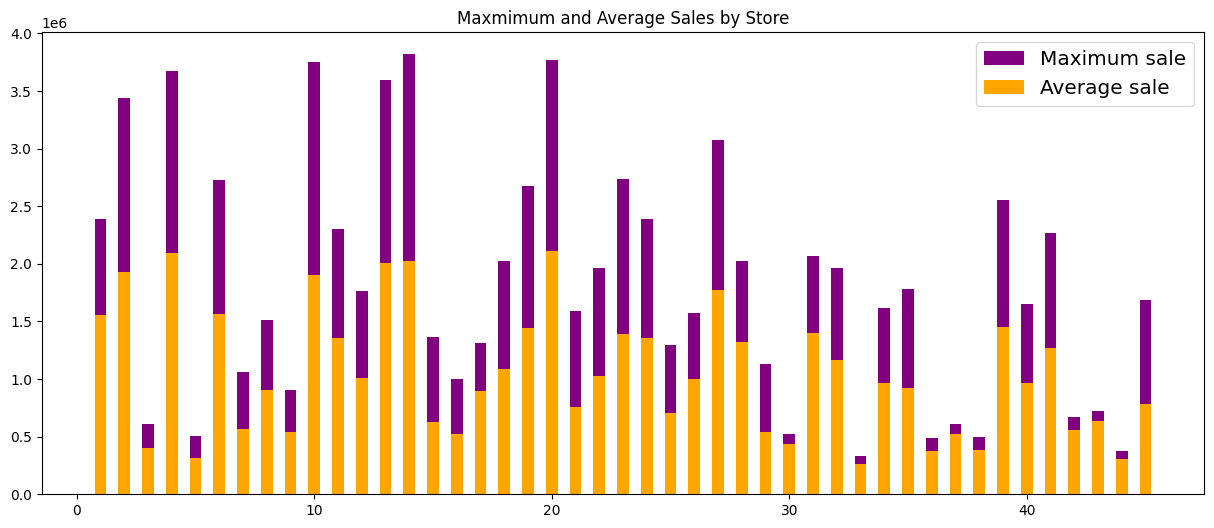

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 6))
plt.title('Maxmimum and Average Sales by Store')

# Create bar plots for maximum and average sales
plt.bar(walmart.Store.unique(), stores_stats['max'], width=0.5, label='maximum', color = 'purple')
plt.bar(walmart.Store.unique(), stores_stats['mean'], width=0.5, label='mean', color = 'orange')

plt.legend(['Maximum sale', 'Average sale'], fontsize='x-large')
plt.show()

We find that the stores with high maximum sales value also has maximum average sales. Now let us find the stores that are performing better than average and those that are performing worse than average.


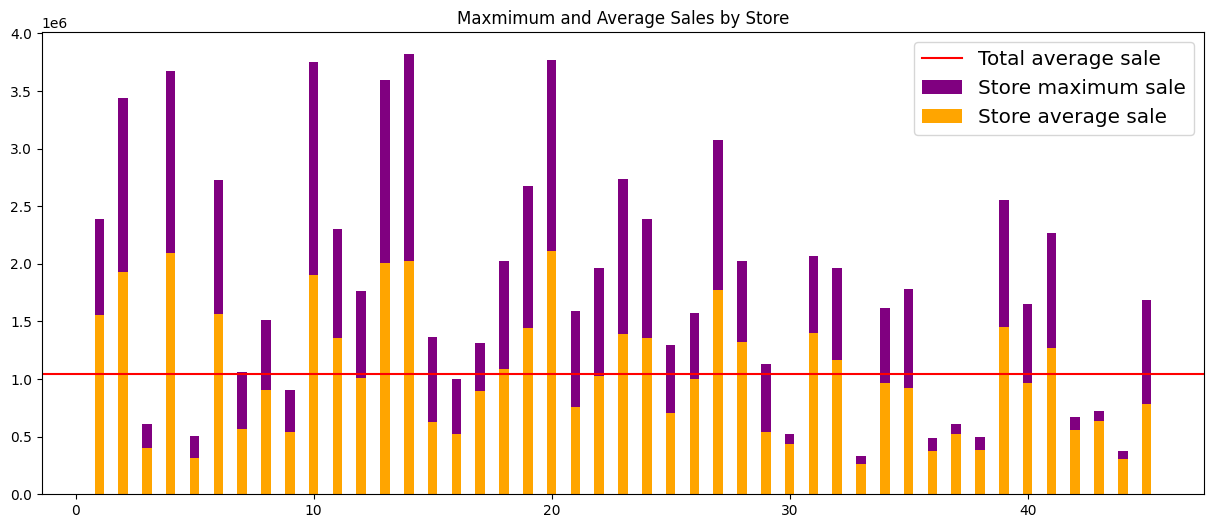

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('Maxmimum and Average Sales by Store')

# Create bar plots for maximum and average sales
plt.bar(walmart.Store.unique(), stores_stats['max'], width=0.4, label='Store maximum sale', color = 'purple')
plt.bar(walmart.Store.unique(), stores_stats['mean'], width=0.4, label='Store average sale', color = 'orange')

# Add a horizontal line representing the total average sale
plt.axhline(y=walmart.Weekly_Sales.mean(), color='red')
plt.legend(['Total average sale', 'Store maximum sale', 'Store average sale'], fontsize='x-large')
plt.show()

Now we want to know what affects the sales the most.
Although we have a hypothesis that Holiday markdown has a lot to do with this.
> Finding the mean weekly sales of the uploaded dataset grouped by Store and Holiday_Flag

In [ ]:
holiday_stats = walmart.groupby(['Store','Holiday_Flag']).Weekly_Sales.agg('mean')
holiday_stats.head()

Store  Holiday_Flag
1      0               1.546957e+06
       1               1.665748e+06
2      0               1.914209e+06
       1               2.079267e+06
3      0               4.000648e+05
Name: Weekly_Sales, dtype: float64

**Plotting the graph for comparison between Holiday weekly sales and Non-Holiday weekly sales.**

AttributeError: ignored

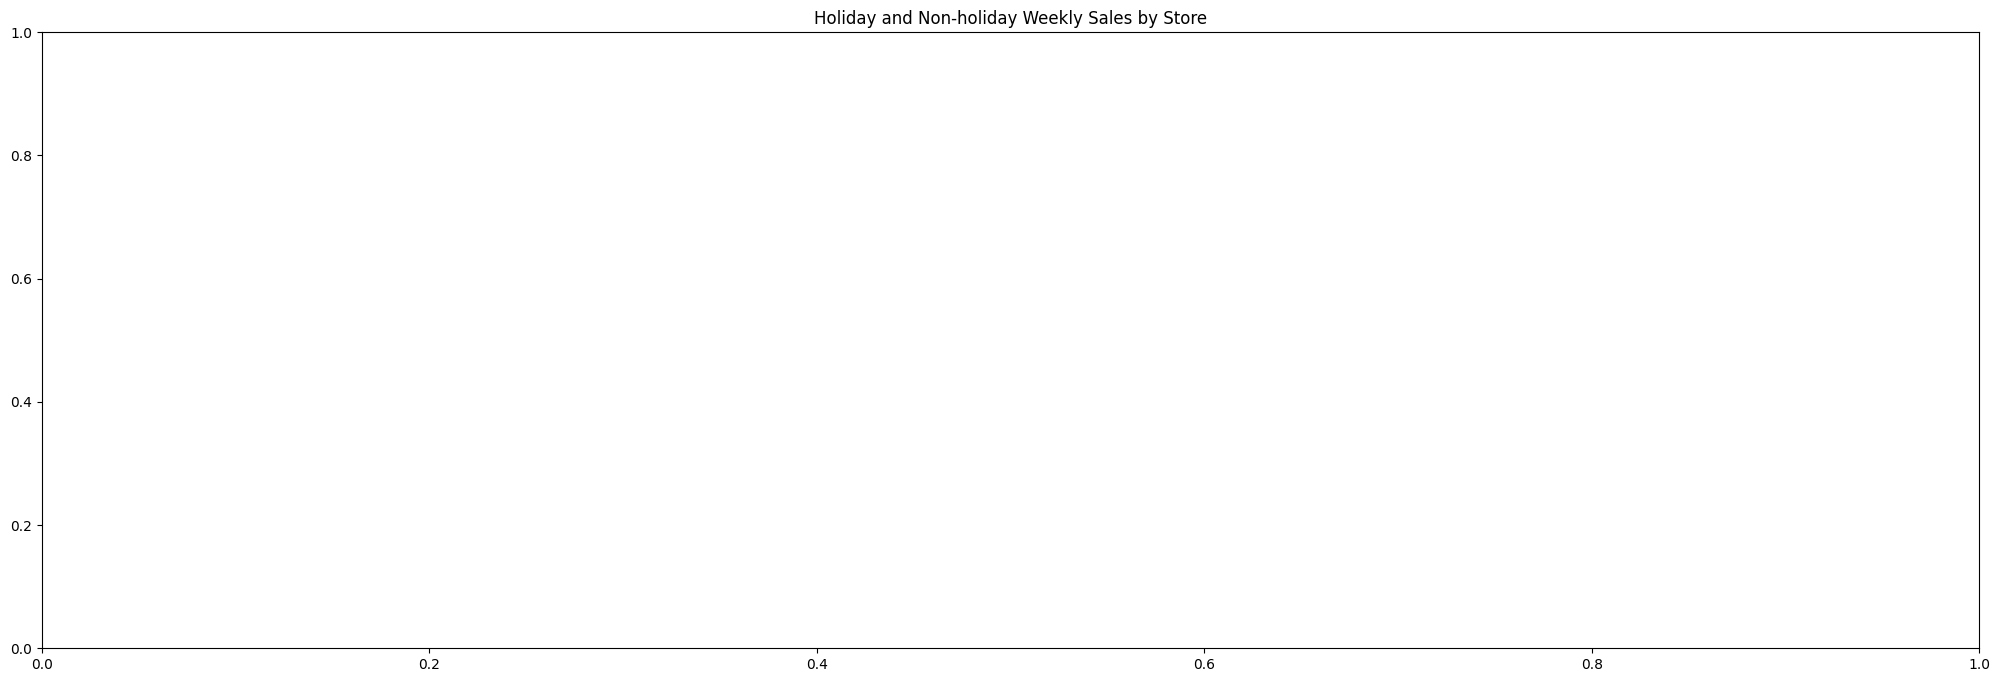

In [ ]:
plt.figure(figsize=(25, 8))
plt.title('Holiday and Non-holiday Weekly Sales by Store')

# Create an array for the x-axis ticks
x = np.arange(len(walmart.Store.unique()))

# Create bar plots for holiday and non-holiday weekly sales
plt.bar(x - 0.1, holiday_stats[holiday_stats.Holiday_Flag == 0].Weekly_Sales, width=0.2, label='No holiday', color = 'purple')
plt.bar(x + 0.1, holiday_stats[holiday_stats.Holiday_Flag == 1].Weekly_Sales, width=0.2, label='Holiday', color = 'orange')

plt.legend(['No Holiday', 'Holiday'], fontsize='x-large')
plt.show()

We observe that average sales during Holiday weeks is higher than the average sales during non-holiday weeks at most stores.
Now let us find how other variables affect the sales?
> For this, we are plotting the graph between Weekly sales and other possible factors

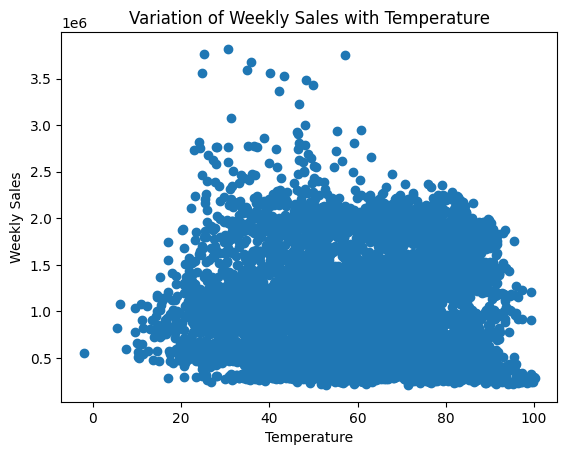

In [ ]:
plt.scatter(walmart.Temperature, walmart.Weekly_Sales)
plt.title('Variation of Weekly Sales with Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

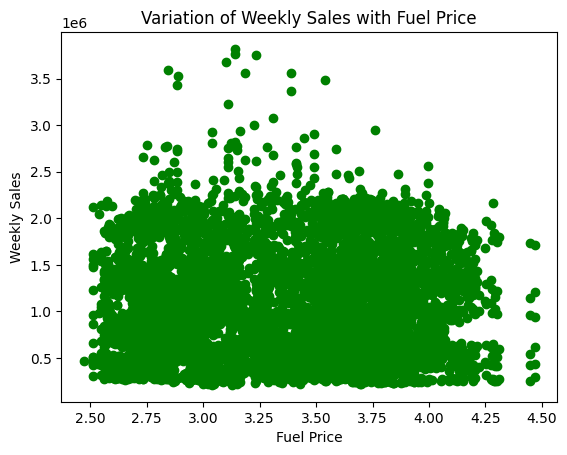

In [ ]:
plt.scatter(walmart.Fuel_Price, walmart.Weekly_Sales, c = 'green')
plt.title('Variation of Weekly Sales with Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

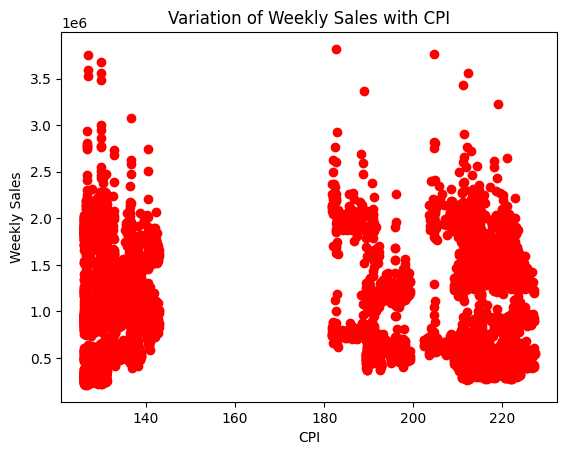

In [ ]:
plt.scatter(walmart.CPI, walmart.Weekly_Sales, c = 'red')
plt.title('Variation of Weekly Sales with CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

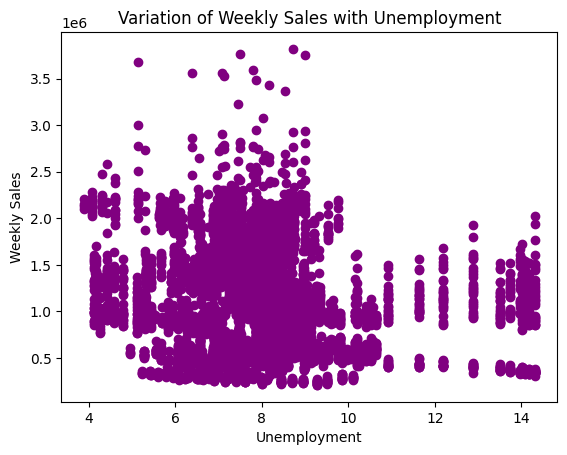

In [ ]:
plt.scatter(walmart.Unemployment, walmart.Weekly_Sales, color = 'purple')
plt.title('Variation of Weekly Sales with Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

We observe that there is no strong correlation between any of the variables including (Unemploment, CPI, Temperature, Fuel_Price) and Weekly Sales.

#### Modeling

>Splitting the data into training sets and testing sets. Here, x is a dataframe created containing all dummy variable except Date and Weekly sales. Y contains the Weekly sales column.

In [ ]:
walmart_dummies = pd.get_dummies(walmart,columns=['Store', 'Holiday_Flag'])
print(walmart_dummies.columns.to_list())
x = walmart_dummies.drop(["Date", "Weekly_Sales"], axis=1)
y = walmart_dummies.Weekly_Sales

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1']


## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

0.9100772586427867

Created an instance of Linear Regression class, then fit the model into training sets and found the variance score and measures the model predictions. 1 is for the perfect model, so .92 is a very good score. 

In [ ]:
print(x_test)
y_pred = lr_model.predict(x_test)
print("r-squared: ", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", metrics.mean_absolute_percentage_error(y_test, y_pred))

      Temperature  Fuel_Price         CPI  Unemployment  Store_1  Store_2  \
5534        55.83       3.157  218.406288         7.244        0        0   
1164        85.02       2.653  214.896576         6.384        0        0   
3611        39.93       2.878  132.763355         8.149        0        0   
4603        95.57       3.049  126.064000         9.495        0        0   
742         86.83       2.692  213.167753         6.973        0        0   
...           ...         ...         ...           ...      ...      ...   
5133        81.76       3.301  220.614875         6.623        0        0   
2892        83.03       2.582  211.180642         8.099        0        0   
6031        79.79       2.640  203.296177         9.816        0        0   
4810        48.04       3.322  129.805194        10.148        0        0   
3795        79.41       4.004  139.893310         7.850        0        0   

      Store_3  Store_4  Store_5  Store_6  ...  Store_38  Store_39  Store_40

R-square is the score of how well the model fits data. Closer to 1, better the fit. Absolute Percentage error is the average error between predicted and actual values. Closer to zero, beter the model. This one looks Great!

Trying out the model without defining the store number to make the model more generalized. The below code chunks shows that the model doesn't work well with this variation. The Mean absolute precentage error is quite high.

In [ ]:
walmart_dummies2 = pd.get_dummies(walmart,columns=['Holiday_Flag'])

x2 = walmart_dummies2.drop(["Store", "Date", "Weekly_Sales"], axis=1)
y2 = walmart_dummies2.Weekly_Sales

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.20)

In [ ]:
lr_model2 = LinearRegression()

lr_model2.fit(x_train2,y_train2)

y_pred2 = lr_model2.predict(x_test2)
print("r-squared: ", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Percentage Error: ", metrics.mean_absolute_percentage_error(y_test2, y_pred2))

r-squared:  0.029897414818191748
Mean Absolute Percentage Error:  0.6707639469349046


Predicting the Sales using our Model.

In [ ]:
user_input = [[68.25, 3.84, 228.354, 4.954, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [75, 4.26, 273.202, 3.9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
user_preds = lr_model.predict(user_input)
print("Sales Predictions by Week")
for i in range(len(user_preds)):
    print("Week " + str(i + 1) + ": ", user_preds[i], "sales")

Sales Predictions by Week
Week 1:  1622229.0 sales
Week 2:  1802395.0 sales


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**The tasks performed are as follows:**

* Imported Libraries and Read Diabetes Dataset: The necessary libraries were imported, and the Walmart dataset was read into the program.
* Exploratory Data Analysis: An analysis was conducted to examine the dataset, including checking for missing values. Plotted graphs to find the coorelation between different variables and Weekly Sales.
* Data Preprocessing: Data was made ready for further analysis including changing the datatype of variables to make it more consistent.
* Modeling: Built a linear Regression Model that predicts the Weekly sales with relatively good accuracy.It works by finding the line of best fit of all the variables and then makes its predictions on that line.